In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


#Import Libraries

In [ ]:
!pip install -U keras

In [ ]:
#Comment
import keras
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.applications import VGG16
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import random

In [ ]:
# Define variable image size and number of classes
img_height, img_width = 150, 150
num_classes = 10

In [ ]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest',
                                   brightness_range=[0.8, 1.2],
                                   channel_shift_range=30)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/AI Deep Learning_Keras/vehicle/train',
                                                    target_size=(img_height, img_width),
                                                    batch_size=32,
                                                    class_mode='categorical')

Found 1280 images belonging to 10 classes.


In [ ]:
validation_generator = valid_datagen.flow_from_directory('/content/drive/MyDrive/AI Deep Learning_Keras/vehicle/val',
                                                        target_size=(img_height, img_width),
                                                        batch_size=32,
                                                        class_mode='categorical',
                                                        shuffle=False)

Found 320 images belonging to 10 classes.


In [ ]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model to prevent training its weights
for layer in base_model.layers:
    layer.trainable = False

model = Sequential([
    base_model,
    Flatten(),

    Dense(1048, activation='relu'),
    BatchNormalization(),
    Dense(1048, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(num_classes, activation='softmax')
])



58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator, epochs=30, validation_data=validation_generator)

Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


40/40 ━━━━━━━━━━━━━━━━━━━━ 468s 10s/step - accuracy: 0.4254 - loss: 2.1894 - val_accuracy: 0.5219 - val_loss: 2.0751
Epoch 2/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 709ms/step - accuracy: 0.7027 - loss: 0.9305 - val_accuracy: 0.6687 - val_loss: 1.1894
Epoch 3/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 708ms/step - accuracy: 0.7766 - loss: 0.7186 - val_accuracy: 0.7125 - val_loss: 1.1471
Epoch 4/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 33s 721ms/step - accuracy: 0.8059 - loss: 0.5515 - val_accuracy: 0.7969 - val_loss: 0.8545
Epoch 5/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 733ms/step - accuracy: 0.8161 - loss: 0.5327 - val_accuracy: 0.7625 - val_loss: 0.9700
Epoch 6/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 717ms/step - accuracy: 0.8256 - loss: 0.4778 - val_accuracy: 0.8125 - val_loss: 0.7237
Epoch 7/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 712ms/step - accuracy: 0.8322 - loss: 0.5239 - val_accuracy: 0.8250 - val_loss: 0.6940
Epoch 8/30
40/40 ━━━━━━━━━━━━━━━━━━━━ 34s 733ms/step - accuracy: 0.8535 - loss: 0.4132 - val_accuracy: 0.8125

In [ ]:
model.save('cnnModule2_3_V1.h5')

In [ ]:
model.save('/content/drive/MyDrive/AI Deep Learning_Keras/cnnModule2_3_V1.h5')

In [ ]:
modelLoaded = load_model('/content/drive/MyDrive/AI Deep Learning_Keras/cnnModule2_3_V1.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 415ms/step

Classification Report:
              precision    recall  f1-score   support

         SUV       0.97      0.97      0.97        32
         bus       0.87      0.81      0.84        32
family sedan       0.68      0.84      0.75        32
 fire engine       0.90      0.81      0.85        32
 heavy truck       0.75      0.75      0.75        32
        jeep       0.85      0.88      0.86        32
     minibus       0.82      0.56      0.67        32
  racing car       1.00      0.78      0.88        32
        taxi       0.72      0.81      0.76        32
       truck       0.68      0.88      0.77        32

    accuracy                           0.81       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.82      0.81      0.81       320



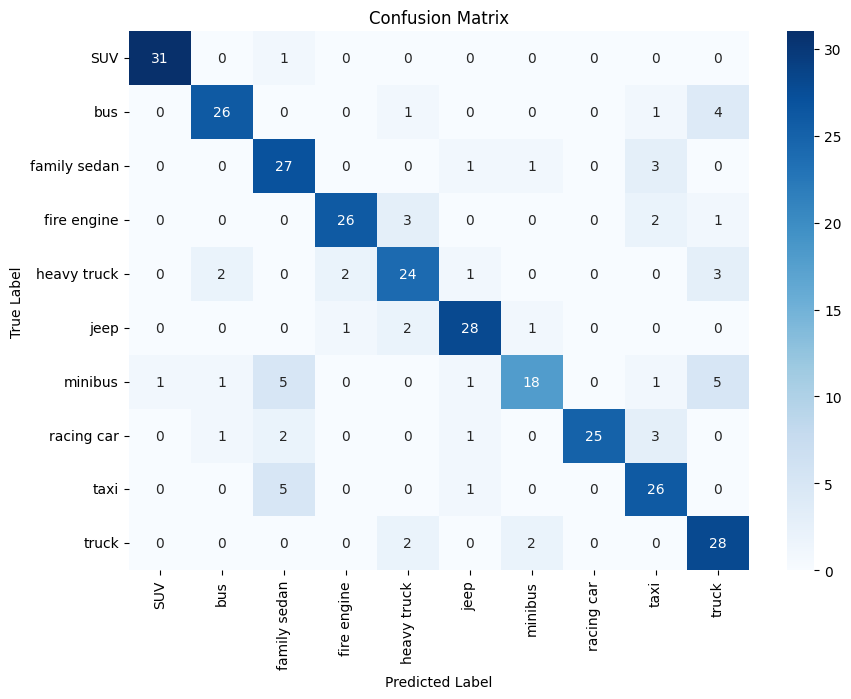

In [ ]:
# Get true labels
true_labels = validation_generator.classes
predictions = modelLoaded.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys())

print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 410ms/step

Classification Report:
              precision    recall  f1-score   support

         SUV       0.97      0.97      0.97        32
         bus       0.87      0.81      0.84        32
family sedan       0.68      0.84      0.75        32
 fire engine       0.90      0.81      0.85        32
 heavy truck       0.75      0.75      0.75        32
        jeep       0.85      0.88      0.86        32
     minibus       0.82      0.56      0.67        32
  racing car       1.00      0.78      0.88        32
        taxi       0.72      0.81      0.76        32
       truck       0.68      0.88      0.77        32

    accuracy                           0.81       320
   macro avg       0.82      0.81      0.81       320
weighted avg       0.82      0.81      0.81       320



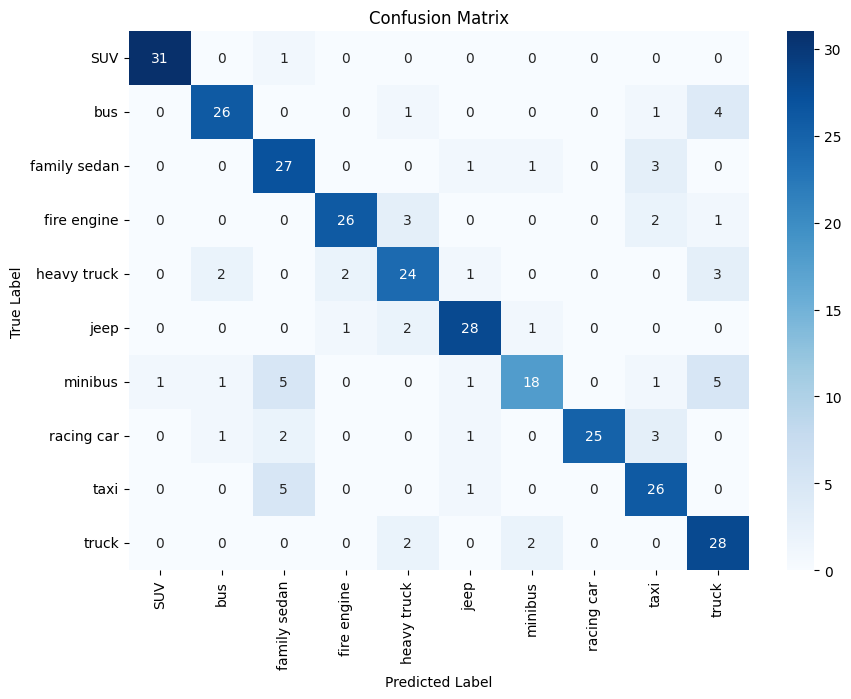

In [ ]:
# Get true labels
true_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Compute confusion matrix and classification report
conf_matrix = confusion_matrix(true_labels, predicted_labels)
class_report = classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys())

print("\nClassification Report:")
print(class_report)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=validation_generator.class_indices.keys(), yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


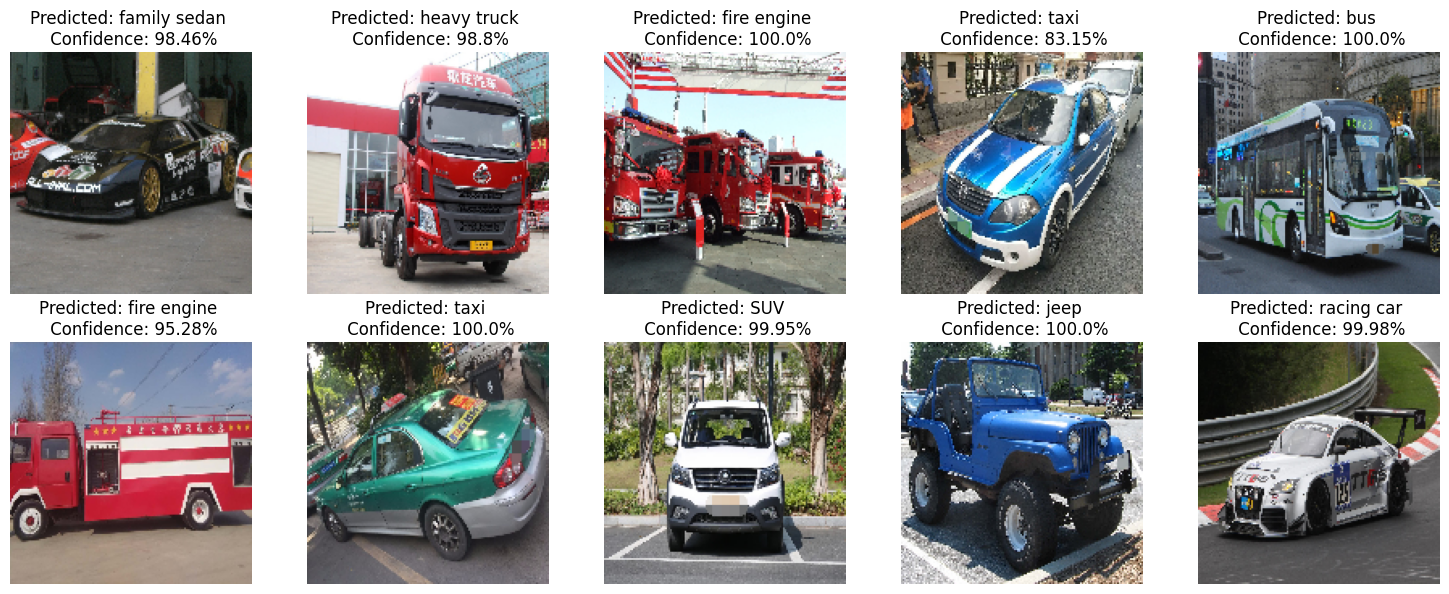

In [ ]:
# Path to the test directory
test_dir = '/content/drive/MyDrive/AI Deep Learning_Keras/vehicle/test'

# Load and preprocess images
def load_and_preprocess_image(image_path, target_size=(img_height, img_width)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Rescale
    return image_array

# Get list of image file paths
image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select a subset of images
num_images_to_display = 10
selected_image_paths = random.sample(image_paths, num_images_to_display)

# Load class labels from the train generator
class_labels = list(train_generator.class_indices.keys())

# Prepare a figure to display images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust layout as needed
axes = axes.ravel()

for i, img_path in enumerate(selected_image_paths):  # Display the selected images
    # Load and preprocess image
    img = load_and_preprocess_image(img_path)

    # Make prediction
    predictions = modelLoaded.predict(img)
    predicted_class = class_labels[np.argmax(predictions)]
    predicted_prob = round(100 * (np.max(predictions[0])), 2)  # Get the highest probability

    # Load the image for display
    img_to_display = load_img(img_path, target_size=(img_height, img_width))

    # Display the image and predicted label with accuracy
    axes[i].imshow(img_to_display)
    axes[i].set_title(f"Predicted: {predicted_class} \n Confidence: {predicted_prob}%")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


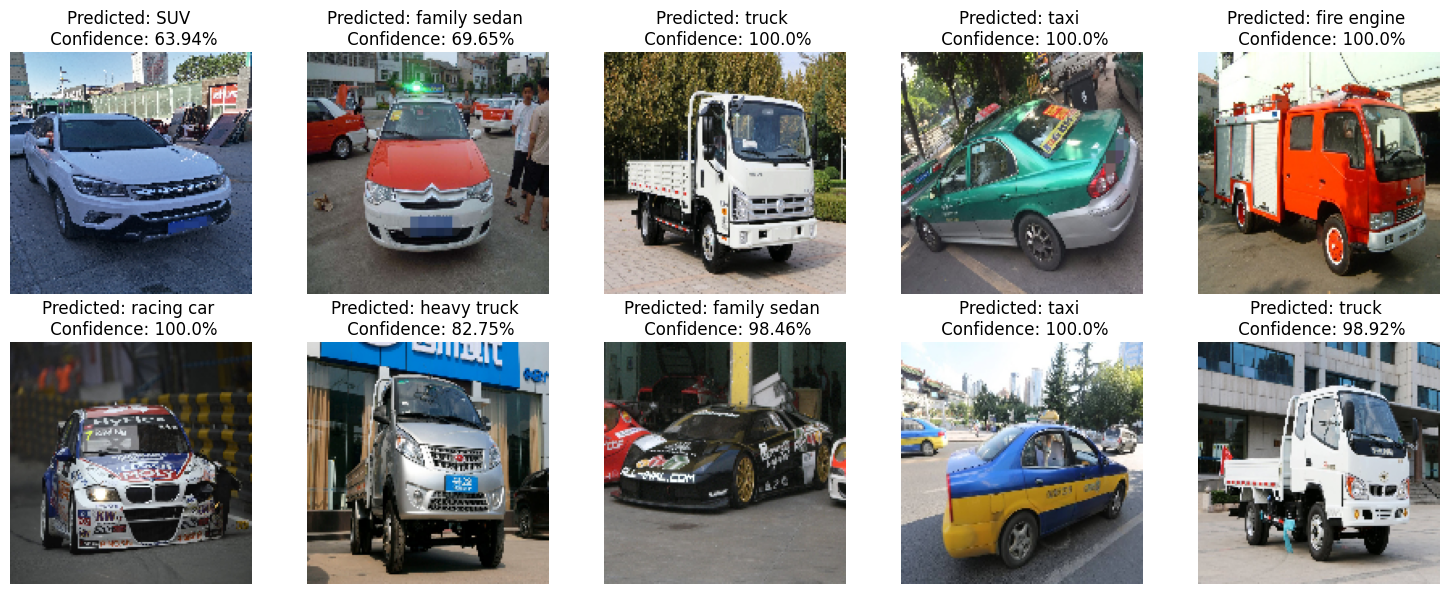

In [ ]:
# Path to the test directory
test_dir = '/content/drive/MyDrive/AI Deep Learning_Keras/vehicle/test'

# Load and preprocess images
def load_and_preprocess_image(image_path, target_size=(img_height, img_width)):
    image = load_img(image_path, target_size=target_size)
    image_array = img_to_array(image)
    image_array = np.expand_dims(image_array, axis=0)  # Add batch dimension
    image_array = image_array / 255.0  # Rescale
    return image_array

# Get list of image file paths
image_paths = [os.path.join(test_dir, fname) for fname in os.listdir(test_dir) if fname.lower().endswith(('.png', '.jpg', '.jpeg'))]

# Randomly select a subset of images
num_images_to_display = 10
selected_image_paths = random.sample(image_paths, num_images_to_display)

# Load class labels from the train generator
class_labels = list(train_generator.class_indices.keys())

# Prepare a figure to display images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15, 6))  # Adjust layout as needed
axes = axes.ravel()

for i, img_path in enumerate(selected_image_paths):  # Display the selected images
    # Load and preprocess image
    img = load_and_preprocess_image(img_path)

    # Make prediction
    predictions = model.predict(img)
    predicted_class = class_labels[np.argmax(predictions)]
    predicted_prob = round(100 * (np.max(predictions[0])), 2)  # Get the highest probability

    # Load the image for display
    img_to_display = load_img(img_path, target_size=(img_height, img_width))

    # Display the image and predicted label with accuracy
    axes[i].imshow(img_to_display)
    axes[i].set_title(f"Predicted: {predicted_class} \n Confidence: {predicted_prob}%")
    axes[i].axis('off')

plt.tight_layout()
plt.show()
